In [349]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

$x^{(i)}=$value of feature $j$ in the $i^{th}$ training example<br>
$x^{(i)}=$ the column vector of all the deature inputs of the $i^{th}$ training example<br>
$m=$the number of training examples<br>
$n=\begin{vmatrix}x^{(i)}\end{vmatrix};$ (the number of features)
#### Hypothesis 
$$ \hat y=h_\theta=\theta_0 + \theta_1x_1+...+\theta_nx_n$$

Using matrix multiplication we can represent our hyptothesis as :
$$ h_\theta=\begin{bmatrix}\theta_0 & \theta_1 & ... & \theta_n\end{bmatrix}\quad\begin{bmatrix}x_0\\
x_1\\...\\x_n\end{bmatrix}=\theta^Tx $$

The training examples are stored in matrix X row-wise:
$$X=\begin{bmatrix}x_0^{(1)} & x_1^{(1)} \\ x_0^{(2)} & x_1^{(2)} \\ x_0^{(3)} & x_1^{(3)}\end{bmatrix}, 
\theta=\begin{bmatrix}\theta_0\\\theta_1\end{bmatrix} $$

Thus we can calculate the hypothesis as a column vector of size (m x 1):
<br><br>
$$h_\theta(X)=X\theta$$

#### Cost Function
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$$

#### Disclaimer
All function implementations assume X already has bias vector added

In [2]:
def costFunction(X,y,theta):
    m = len(X)
    h = X @ theta
    J = (1/(2*m))*np.sum((h - y)**2)
    return J

#### Vectorized cost function 
$$ J(\theta)=1/2m(X\theta-\vec{y})^T(X\theta-\vec{y}) $$

In [38]:
def costFunction(X, y, theta):
    m = len(X)
    h = X @ theta
    J = (1/(2*m)) * (h - y).T @ (h - y)
    return np.asscalar(J)

####  Gradient Descent
repeat until convergence: $\{$
$$ \theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\quad \textrm{for}\quad j:=0..n$$
$\}$

Implementation below overflows with alpha larger than ~0.01. Octave implementation worked with values over one without hickups. As of now I have no idea why this happens. Need to investigate further.

In [344]:
def gradientDescent(X,y,theta,alpha,num_iters):
    history = list()
    m = len(X)
    for i in range(num_iters):
        h = X @ theta
        errors = h - y
        delta = (alpha * (1/m)) * (X.transpose() @ errors)
        theta = theta - delta
        J = costFunction(X,y,theta)
        history.append(J)
    return theta, history

#### Vectorized gradient descent

The gradient descent rule can be represented as:<br>
$$\theta:=\theta-\alpha\nabla J(\theta)$$<br>
Where $\nabla J$ is a column vector of the form:<br>
$$\nabla J(\theta)=\begin{bmatrix}\frac{\partial J(\theta)}{\partial \theta_1} \\
\frac{\partial J(\theta)}{\partial \theta_1} \\
... \\
\frac{\partial J(\theta)}{\partial \theta_n}\end{bmatrix}$$<br>
The j-th component of gradient is the summation of the product of two terms:<br><br>
$$\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})*x_j^{(i)}=\frac{1}{m}\sum_{i=1}^mx_j^{(i)}*(h_\theta(x^{(i)})-y^{(i)}) $$
<br>
$x_j^{(i)}$ for i = 1,...,m represents the m elements of the j-th column, $\vec{x_j}$, of the training set X.<br>
The other term $(h_\theta(x^{(i)})-y^{(i)})$ is the vector of the deviations between the predicitons $h_\theta (x^{(i)}$ and the true values $y^{(i)}$.<br> We can rewrite $\frac{\partial J(\theta)}{\partial \theta_j}$ as: <br>
$$\frac{\partial J(\theta)}{\partial \theta_j}\quad=\frac {1}{m}\vec{x}_j^T(X\theta-\vec y)$$<br>
$$\nabla J(\theta)\quad=\frac{1}{m}X^T(X\theta-\vec y)$$<br>
Thus we can vectorize the Gradient Descent rule as:
$$\theta:=\theta - \frac{\alpha}{m}X^T(X\theta  - y) $$

Following implementation overflows even faster than the one before. Find out why?


In [345]:
# def gradientDescent(X,y,theta,alpha,num_iters):
#     history = list()
#     m = len(X)
#     for i in range(num_iters):
#         h = X @ theta
#         theta = (1/2)*(X.T@(h-y))
#         J = costFunction(X,y,theta)
#         history.append(J)
#     return theta, history

#### Normal equation
closed-form solution to linear regression

$$ \theta=(X^TX)^{-1}X^T\vec{y} $$

Somehow the following implementation gives slightly different results than expected (see single variable example), even though identical function in octave behaves as expected.
As it turns out I am getting similar results using np.linalg.solve.
I am going to check error and variance score of those solutions vs gradient descent.
After testing both solve and normalEquation results are slighly more accurate.

In [346]:
def normalEquation(X, y):
#     theta = np.linalg.inv((X.T @ X))@(X.T@y)
    theta = np.linalg.pinv((X.T @ X))@(X.T@y)
    return theta

X = np.array([ [2,1, 3], [7, 1, 9], [1, 8, 1], [3, 7, 4,] ])
y = np.array([[2],[5], [5], [6]]);

print("X\n",X,"\n","y","\n",y, "\n")
print("Normal equation\n", normalEquation(X, y))
print("Expected result\n",np.array([[0.0083857],[0.5681342],[0.4863732]]))

def solve(X, y):
    XTX=X.T @ X
    XTy=X.T @ y
    return np.linalg.solve(XTX,XTy)
print("-----------------------------")
print("Testing with solve\n")
print(solve(X,y))

X
 [[2 1 3]
 [7 1 9]
 [1 8 1]
 [3 7 4]] 
 y 
 [[2]
 [5]
 [5]
 [6]] 

Normal equation
 [[0.00838574]
 [0.56813417]
 [0.48637317]]
Expected result
 [[0.0083857]
 [0.5681342]
 [0.4863732]]
-----------------------------
Testing with solve

[[0.00838574]
 [0.56813417]
 [0.48637317]]


#### Mean squared error
I don't know why did put it here instead of using scypi

In [347]:
# def mean_squared_error(Y, YH):
#      return np.square(Y - YH).mean()

### Single variable example

Dataset 
1. population of a city (10000s)
2. the profit of a food truck in that city ($10000s)

   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


       Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000




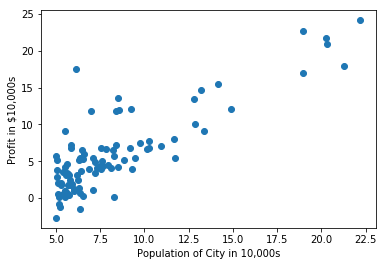

In [405]:
#data = np.loadtxt(open('ex1data1.txt', 'rb'), delimiter=',', skiprows=0)
df = pd.read_csv("ex1data1.txt", header=None)
#df = pd.DataFrame(data)
df.columns=["Population", "Profit"]
print(df.head())
print ("\n")
print(df.describe())
print ("\n")

data = df.values
m = len(data)

X = data[:,0][:,np.newaxis]
y = data[:,1][:,np.newaxis]

plt.scatter(X, y )
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

X = np.hstack((np.ones((m,1)),X))
n = X.shape[1]

In [406]:
theta = np.zeros((n,1))

J = costFunction(X,y,theta)
print("With theta = [0 ; 0] Cost computed = %.2f" % J, "\n")
print("Expected cost value (approx) 32.07\n")

theta = np.array([-1,2])[:,np.newaxis]
J = costFunction(X,y,theta)

print("With theta = [-1 ; 2] Cost computed = %.2f" % J, "\n")
print("Expected cost value (approx) 54.24\n")


With theta = [0 ; 0] Cost computed = 32.07 

Expected cost value (approx) 32.07

With theta = [-1 ; 2] Cost computed = 54.24 

Expected cost value (approx) 54.24



Expected theta values (approx): 
 -3.6303
  1.1664

------------------------

Theta found by gradient descent: 
 [[-3.63029144]
 [ 1.16636235]] 

Mean squared error:  8.966776513175452 

Variance score:  0.7016044731117159 

------------------------

Theta found by normal equation: 
 [[-3.89578088]
 [ 1.19303364]] 

Mean squared error:  8.953942751950358 

Variance score:  0.7020315537841397 

------------------------

Theta found using np.solve
 [[-3.89578088]
 [ 1.19303364]]
Mean squared error:  8.953942751950358 

Variance score:  0.7020315537841397 

------------------------

For population = 35,000, we predict a profit of 2798.368764

For population = 70,000, we predict a profit of 44554.546310



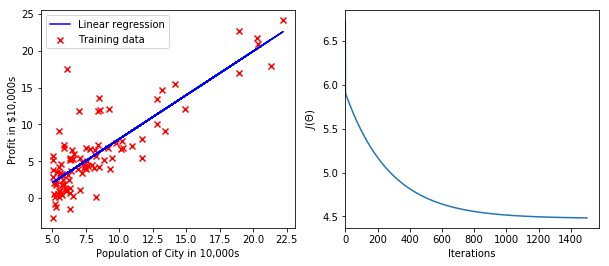

In [409]:
theta = np.zeros((n,1))
iterations = 1500
alpha = 0.01
theta,history = gradientDescent(X,y,theta,alpha, iterations)
#plt.plot(range(iterations),history)

print("Expected theta values (approx): \n -3.6303\n  1.1664\n");

print("------------------------\n")
print("Theta found by gradient descent: \n", theta, "\n")
y_pred = X @ theta
print("Mean squared error: ", mean_squared_error(y, y_pred), "\n")
print("Variance score: ", r2_score(y, y_pred),"\n")
print("------------------------\n")

theta = normalEquation(X,y)
y_pred = X @ theta
print("Theta found by normal equation: \n", theta, "\n")
print("Mean squared error: ", mean_squared_error(y, y_pred), "\n")
print("Variance score: ", r2_score(y, y_pred),"\n")
print("------------------------\n")

theta = solve(X, y)
y_pred = X @ theta
print("Theta found using np.solve\n", theta)
print("Mean squared error: ", mean_squared_error(y,y_pred), "\n")
print("Variance score: ", r2_score(y, y_pred),"\n")
print("------------------------\n")

fig, [ax1,ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax1.scatter(X[:,1], y, color="red", marker="x")
ax1.plot(X[:,1], X @ theta, color="blue")
ax1.legend(['Linear regression', 'Training data'])
ax1.set_xlabel("Population of City in 10,000s")
ax1.set_ylabel("Profit in $10,000s")

ax2.plot(np.arange(iterations), np.array(history)[:, np.newaxis])
ax2.set_xlabel("Iterations")
ax2.set_ylabel("$J(\Theta)$")
ax2.set_xlim(left=0)
predict1 = [1, 3.5] @ theta;
print("For population = 35,000, we predict a profit of %f\n" % (predict1*10000))
predict2 = [1, 7] @ theta;
print("For population = 70,000, we predict a profit of %f\n" % (predict2*10000))


Visualizing J(theta_0, theta_1) ...



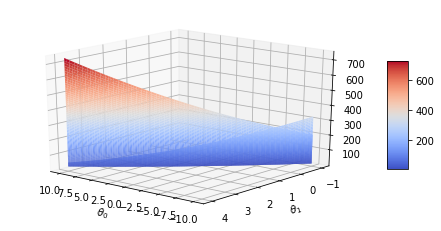

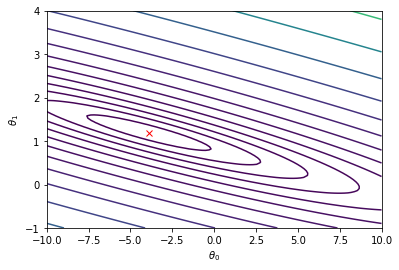

In [410]:

print("Visualizing J(theta_0, theta_1) ...\n")
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-1,4,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i][j] = costFunction(X, y, t)
        
fig = plt.figure(figsize=(8,4))
ax = fig.gca(projection='3d')
#ax.plot_wireframe(theta0_vals, theta1_vals, J_vals, rstride=5, cstride=5)
ax.view_init(20,130)
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals.T,rstride=1, cstride=1,cmap=plt.cm.coolwarm, linewidth=0, antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
# ax.set_zlim(0, 800)
plt.show()

plt.contour(theta0_vals, theta1_vals, J_vals.T, levels=np.logspace(-2,3,30))
plt.plot(theta[0,0], theta[1,0],'rx')
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.show()


#### visualizing convergence for different alpha values

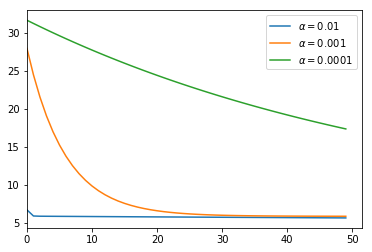

In [411]:
_, J1 = gradientDescent(X,y,np.zeros((n,1)), 0.01, 50)
_, J2 = gradientDescent(X,y,np.zeros((n,1)), 0.001, 50)
_, J3 = gradientDescent(X,y,np.zeros((n,1)), 0.0001, 50)
fig, ax = plt.subplots()
ax.plot(range(50), J1)
ax.plot(range(50), J2)
ax.plot(range(50), J3)
ax.legend([r"$\alpha=0.01$", r"$\alpha=0.001$", r"$\alpha=0.0001$"])
ax.set_xlim(left=0)
plt.show()

### With scikit learn

Coefficients: 1.19
Mean squared error: 8.95
Variance score: 0.70


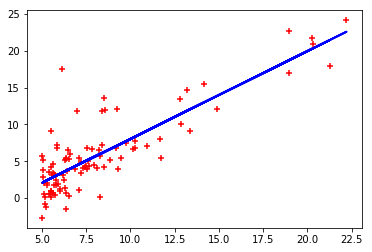

In [412]:
from sklearn import linear_model


X = data[:,0,np.newaxis]
y = data[:,1,np.newaxis]
regr = linear_model.LinearRegression()
regr.fit(X, y)
pred = regr.predict(X)

# The coefficients
print('Coefficients: %.2f' % regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, pred))
plt.scatter(X, y,  color="red", marker="+")
plt.plot(X, pred, color='blue', linewidth=2)
plt.show()


#### slicing data into train and test samples

Coefficients: 1.19
Mean squared error: 6.59
Variance score: 0.20


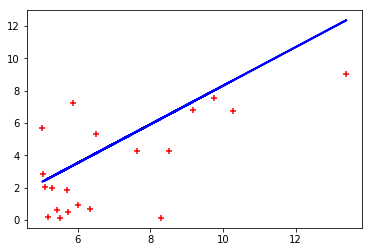

In [413]:
X = data[:,0,np.newaxis]
y = data[:,1,np.newaxis]



X_train = X[:-20]
y_train = y[:-20]
X_test = X[-20:]
y_test = y[-20:]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: %.2f' % regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
plt.scatter(X_test, y_test,  color="red", marker="+")
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

### Mulitvariate example

Training set of housing prices in Portland, Oregon.
Features:
1. size of the house (in square feet)
2. the number of bedrooms
3. price of the house.

In [425]:
df = pd.read_csv("ex1data2.txt", header=None)
df.columns = ["size", "bedrooms", "price"]
print(df.head(), "\n\n", df.describe())

X = df.values[:,:2]
y = df.values[:,2,np.newaxis]
m = len(X)
X = np.hstack((np.ones((m,1)),X))
n = X.shape[1]

   size  bedrooms   price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900 

               size   bedrooms          price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


#### Feature normalization

In [433]:
def normalizeFeatures(X):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    return X-mu / sigma

X_norm = normalizeFeatures(df.values[:,:2])
X_norm = np.hstack((np.ones((m,1)), X_norm))

print("head of X without normalization:\n\n", X[:10,:], "\n")
print("head of normalized X:\n\n", X_norm[:10,:], "\n")
X.mean(axis=0)

head of X without normalization:

 [[1.000e+00 2.104e+03 3.000e+00]
 [1.000e+00 1.600e+03 3.000e+00]
 [1.000e+00 2.400e+03 3.000e+00]
 [1.000e+00 1.416e+03 2.000e+00]
 [1.000e+00 3.000e+03 4.000e+00]
 [1.000e+00 1.985e+03 4.000e+00]
 [1.000e+00 1.534e+03 3.000e+00]
 [1.000e+00 1.427e+03 3.000e+00]
 [1.000e+00 1.380e+03 3.000e+00]
 [1.000e+00 1.494e+03 3.000e+00]] 

head of normalized X:

 [[ 1.00000000e+00  2.10145526e+03 -1.21098897e+00]
 [ 1.00000000e+00  1.59745526e+03 -1.21098897e+00]
 [ 1.00000000e+00  2.39745526e+03 -1.21098897e+00]
 [ 1.00000000e+00  1.41345526e+03 -2.21098897e+00]
 [ 1.00000000e+00  2.99745526e+03 -2.10988971e-01]
 [ 1.00000000e+00  1.98245526e+03 -2.10988971e-01]
 [ 1.00000000e+00  1.53145526e+03 -1.21098897e+00]
 [ 1.00000000e+00  1.42445526e+03 -1.21098897e+00]
 [ 1.00000000e+00  1.37745526e+03 -1.21098897e+00]
 [ 1.00000000e+00  1.49145526e+03 -1.21098897e+00]] 



array([1.00000000e+00, 2.00068085e+03, 3.17021277e+00])

In [435]:
print("np.linarg.solve first")
theta = solve(X, y)
y_pred = X@theta
print("mean quared error: ", mean_squared_error(y, y_pred))
print('Variance score: %.2f' % r2_score(y, y_pred))

print("-------------------------------")

print("scikit linear_model")
regr = linear_model.LinearRegression()
regr.fit(X, y)
y_pred = regr.predict(X)
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
print('Variance score: %.2f' % r2_score(y, y_pred))

print("-------------------------------")

print ("Gradient descent without normalization")
theta_init = np.zeros((n,1))
theta, history = gradientDescent(X,y, theta_init, 0.0000001, 1400)
y_pred = X@theta
print("Mean squared error: ", mean_squared_error(y, y_pred))
print('Variance score: %.2f' % r2_score(y, y_pred))

print("-------------------------------")

print("Gradient descent with normalization")
theta, history = gradientDescent(X_norm, y, theta_init, 0.000000001,1400)
y_pred = X @ theta
print("Mean squared error: ", mean_squared_error(y,y_pred))
print('Variance score: %.2f' % r2_score(y, y_pred))


np.linarg.solve first
mean quared error:  4086560101.2056565
Variance score: 0.73
-------------------------------
scikit linear_model
Mean squared error: 4086560101.21
Variance score: 0.73
-------------------------------
Gradient descent without normalization
Mean squared error:  4795619596.379908
Variance score: 0.69
-------------------------------
Gradient descent with normalization
Mean squared error:  4795762264.139543
Variance score: 0.69
